In [21]:
#In this project with the help of a youtube tutorial, that i mainly using to guide me, im trying to do a 
# Machine Learning that can predict how many each country wins in 2012 and 2026 olympics
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print('All Done')
#Import all things i wanna use, 

All Done


In [22]:
atletas= pd.read_csv(r"C:\Users\quint\Music\Limbo\Databse\olimpiadas\teams.csv")
#Import the file that is avaliable on https://github.com/dataquestio/project-walkthroughs/tree/master/beginner_ml

In [23]:
atletas.columns

Index(['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'medals', 'prev_medals', 'prev_3_medals'],
      dtype='object')

In [24]:
atletas.corr()["medals"]

year            -0.021603
events           0.771330
athletes         0.840817
age              0.025096
height           0.141055
weight           0.090577
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
Name: medals, dtype: float64

In [25]:
atletas= atletas[["team","country","year","athletes","events","prev_medals","medals"]]
#Info like team country and year are essencial, and next to them i choose what have strong corr

In [26]:
atletas.head(9)

,team,country,year,athletes,events,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,0.0,0
1,AFG,Afghanistan,1968,5,5,0.0,0
2,AFG,Afghanistan,1972,8,8,0.0,0
3,AFG,Afghanistan,1980,11,11,0.0,0
4,AFG,Afghanistan,2004,5,5,0.0,0
5,AFG,Afghanistan,2008,4,4,0.0,1
6,AFG,Afghanistan,2012,6,6,1.0,1
7,AFG,Afghanistan,2016,3,3,1.0,0
8,AHO,Netherlands Antilles,1964,4,4,0.0,0


In [27]:
atletas[atletas.isnull().any(axis=1)]
#Checking for any nul data that can interfer with the training

,team,country,year,athletes,events,prev_medals,medals
19,ALB,Albania,1992,9,8,NaN,0
26,ALG,Algeria,1964,7,7,NaN,0
39,AND,Andorra,1976,3,2,NaN,0
50,ANG,Angola,1980,17,14,NaN,0
59,ANT,Antigua and Barbuda,1976,17,11,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,NaN,0
2103,YAR,North Yemen,1984,3,3,NaN,0
2105,YEM,Yemen,1992,8,8,NaN,0
2112,YMD,South Yemen,1988,5,5,NaN,0


In [28]:
atletas

,team,country,year,athletes,events,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,0.0,0
1,AFG,Afghanistan,1968,5,5,0.0,0
2,AFG,Afghanistan,1972,8,8,0.0,0
3,AFG,Afghanistan,1980,11,11,0.0,0
4,AFG,Afghanistan,2004,5,5,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,19,0.0,0
2140,ZIM,Zimbabwe,2004,14,11,0.0,3
2141,ZIM,Zimbabwe,2008,16,15,3.0,4
2142,ZIM,Zimbabwe,2012,9,8,4.0,0


In [29]:
atletas= atletas.dropna()

In [30]:
atletas

,team,country,year,athletes,events,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,0.0,0
1,AFG,Afghanistan,1968,5,5,0.0,0
2,AFG,Afghanistan,1972,8,8,0.0,0
3,AFG,Afghanistan,1980,11,11,0.0,0
4,AFG,Afghanistan,2004,5,5,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,19,0.0,0
2140,ZIM,Zimbabwe,2004,14,11,0.0,3
2141,ZIM,Zimbabwe,2008,16,15,3.0,4
2142,ZIM,Zimbabwe,2012,9,8,4.0,0


In [31]:
#We gonna use the last two Olympics of the data set as test, and the rest as train
Train_Data= atletas[atletas['year']<2009].copy()
Test_Data= atletas[atletas['year']>2011].copy()

In [32]:
Train_Data

,team,country,year,athletes,events,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,0.0,0
1,AFG,Afghanistan,1968,5,5,0.0,0
2,AFG,Afghanistan,1972,8,8,0.0,0
3,AFG,Afghanistan,1980,11,11,0.0,0
4,AFG,Afghanistan,2004,5,5,0.0,0
...,...,...,...,...,...,...,...
2137,ZIM,Zimbabwe,1992,28,22,0.0,0
2138,ZIM,Zimbabwe,1996,21,15,0.0,0
2139,ZIM,Zimbabwe,2000,26,19,0.0,0
2140,ZIM,Zimbabwe,2004,14,11,0.0,3


In [33]:
Test_Data

,team,country,year,athletes,events,prev_medals,medals
6,AFG,Afghanistan,2012,6,6,1.0,1
7,AFG,Afghanistan,2016,3,3,1.0,0
24,ALB,Albania,2012,10,9,0.0,0
25,ALB,Albania,2016,6,6,0.0,0
37,ALG,Algeria,2012,39,29,2.0,1
...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,0.0,0
2131,ZAM,Zambia,2012,7,7,0.0,0
2132,ZAM,Zambia,2016,7,7,0.0,0
2142,ZIM,Zimbabwe,2012,9,8,4.0,0


In [34]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
linear= LinearRegression()

In [35]:
#Training Part
predictors= ["athletes", "events","prev_medals"]
linear.fit(Train_Data[["athletes","events","prev_medals"]],Train_Data["medals"])

LinearRegression()

In [64]:
#Test
Predictions= linear.predict(Test_Data[["athletes","events","prev_medals"]])
print("end")

end


In [65]:
display(Predictions)

array([ 4.14631164e-01,  9.06609940e-01, -5.27318313e-01, -2.67293075e-01,
       -3.55746506e-01, -4.42279726e-01, -2.67293075e-01,  6.06927759e-02,
        4.87557366e+00,  2.78799182e+00,  6.06927759e-02,  8.24514001e-01,
        4.36914577e+01,  3.58107287e+01,  1.20375686e-01, -2.02142934e+00,
        6.06927759e-02, -3.53395373e-02,  6.06927759e-02,  6.06927759e-02,
        1.39190630e+02,  1.21794346e+02, -3.68205037e+00, -3.72001907e+00,
       -3.39355552e+00, -1.00797975e+00,  5.88164333e+00,  4.33966660e+00,
       -4.31286000e-01, -4.31286000e-01,  1.96614000e-01, -6.23350627e-01,
       -2.67293075e-01, -5.27318313e-01,  8.95148913e+00,  5.47198712e+00,
       -1.03300149e-01, -2.67293075e-01, -1.99332463e-01, -5.95278926e-01,
        3.88678627e-01,  3.88678627e-01, -5.95278926e-01,  1.00581687e-01,
        2.24685701e-01,  2.24685701e-01,  1.98497609e+01,  1.52869285e+01,
       -1.03300149e-01, -4.59357701e-01,  6.06927759e-02,  1.87431300e+00,
        7.02439257e+01,  

In [66]:
Test_Data["Predictions"] = Predictions
#Putting Predictions side to side with Medals

In [67]:
Test_Data

,team,country,year,athletes,events,prev_medals,medals,Predictions
6,AFG,Afghanistan,2012,6,6,1.0,1,0.414631
7,AFG,Afghanistan,2016,3,3,1.0,0,0.906610
24,ALB,Albania,2012,10,9,0.0,0,-0.527318
25,ALB,Albania,2016,6,6,0.0,0,-0.267293
37,ALG,Algeria,2012,39,29,2.0,1,-0.355747
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,0.0,0,0.224686
2131,ZAM,Zambia,2012,7,7,0.0,0,-0.431286
2132,ZAM,Zambia,2016,7,7,0.0,0,-0.431286
2142,ZIM,Zimbabwe,2012,9,8,4.0,0,2.364372


In [68]:
Test_Data.loc[Test_Data['Predictions'] < 0, "Predictions"] = 0
#Its really Strange and Wrong to Predict a country losing medals

In [70]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(Test_Data["medals"], Test_Data["Predictions"])
error
#Seing how Many errors we have as a mean

3.2930518515140705

In [81]:
Test_Data[Test_Data["country"] == "Brazil"]
#Checking for my Country

,team,country,year,athletes,events,prev_medals,medals,Predictions
284,BRA,Brazil,2012,306,138,78.0,59,70.243926
285,BRA,Brazil,2016,583,222,59.0,50,88.278992


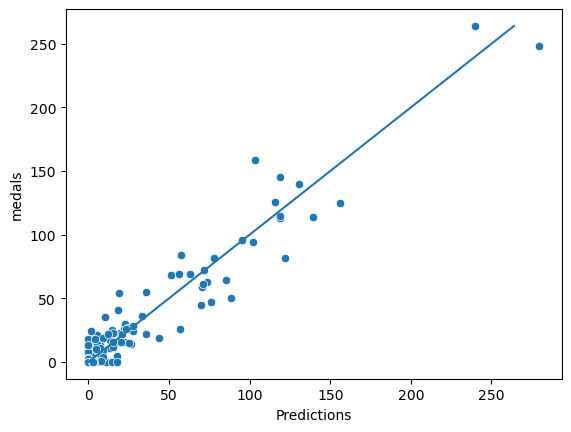

In [86]:
sns.scatterplot(x=Test_Data["Predictions"], y=Test_Data["medals"], data=Test_Data)
sns.lineplot(x=Test_Data["medals"], y=Test_Data["medals"], data=Test_Data)
plt.show()
#Visualizing the diference

In [94]:
x=(Test_Data["medals"]-Test_Data["Predictions"])
x.mean()

0.4405013653619297

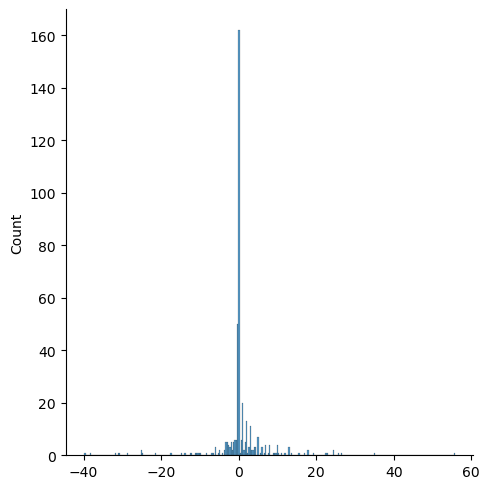

In [93]:
sns.displot(x)
#Triyng to see the diference of the predicted and the real, we have a problem made by changing negative
# Predictions values to zero

In [ ]:
#We can see that model worked well for what i wanted, even tough it can be very wrong sometimes
# It can work better for a bigger dataset, and for something that have a lot of unexpected things associated
# Like we can think about Phelps and Bolt, the system doenst know when they stop competing, and in consequence changing
# the medal for their countrys.
# I wish i could see the system with the Tokyo 2020-2021 games, that have new sports and was missing Russia